In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('nba_team_stats_00_to_21_postprocessed.csv')
selected = ['2017-18','2000-01','2013-14','2015-16','2007-08']
data = data.drop(['Unnamed: 0'],axis=1)
trainingDF = data[data["SEASON"].str.contains("2017-18|2000-01|2013-14|2015-16|2007-08") == False]
print(trainingDF)
testingDF = data[data["SEASON"].str.contains("2017-18|2000-01|2013-14|2015-16|2007-08") == True]
print(testingDF)

<bound method DataFrame.corr of      Unnamed: 0  teamstatspk                   TEAM  GP   W   L   WIN%   MIN  \
0             0            0           Phoenix Suns  52  42  10  0.808  48.1   
1             1            1  Golden State Warriors  53  40  13  0.755  48.2   
2             2            2      Memphis Grizzlies  55  37  18  0.673  48.3   
3             3            3             Miami Heat  54  34  20  0.630  48.5   
4             4            4          Chicago Bulls  53  33  20  0.623  48.1   
..          ...          ...                    ...  ..  ..  ..    ...   ...   
621         621          621          Atlanta Hawks  82  25  57  0.305  48.1   
622         622          622    Vancouver Grizzlies  82  23  59  0.280  48.2   
623         623          623     Washington Wizards  82  19  63  0.232  48.0   
624         624          624  Golden State Warriors  82  17  65  0.207  48.2   
625         625          625          Chicago Bulls  82  15  67  0.183  48.4   

       

<AxesSubplot:>

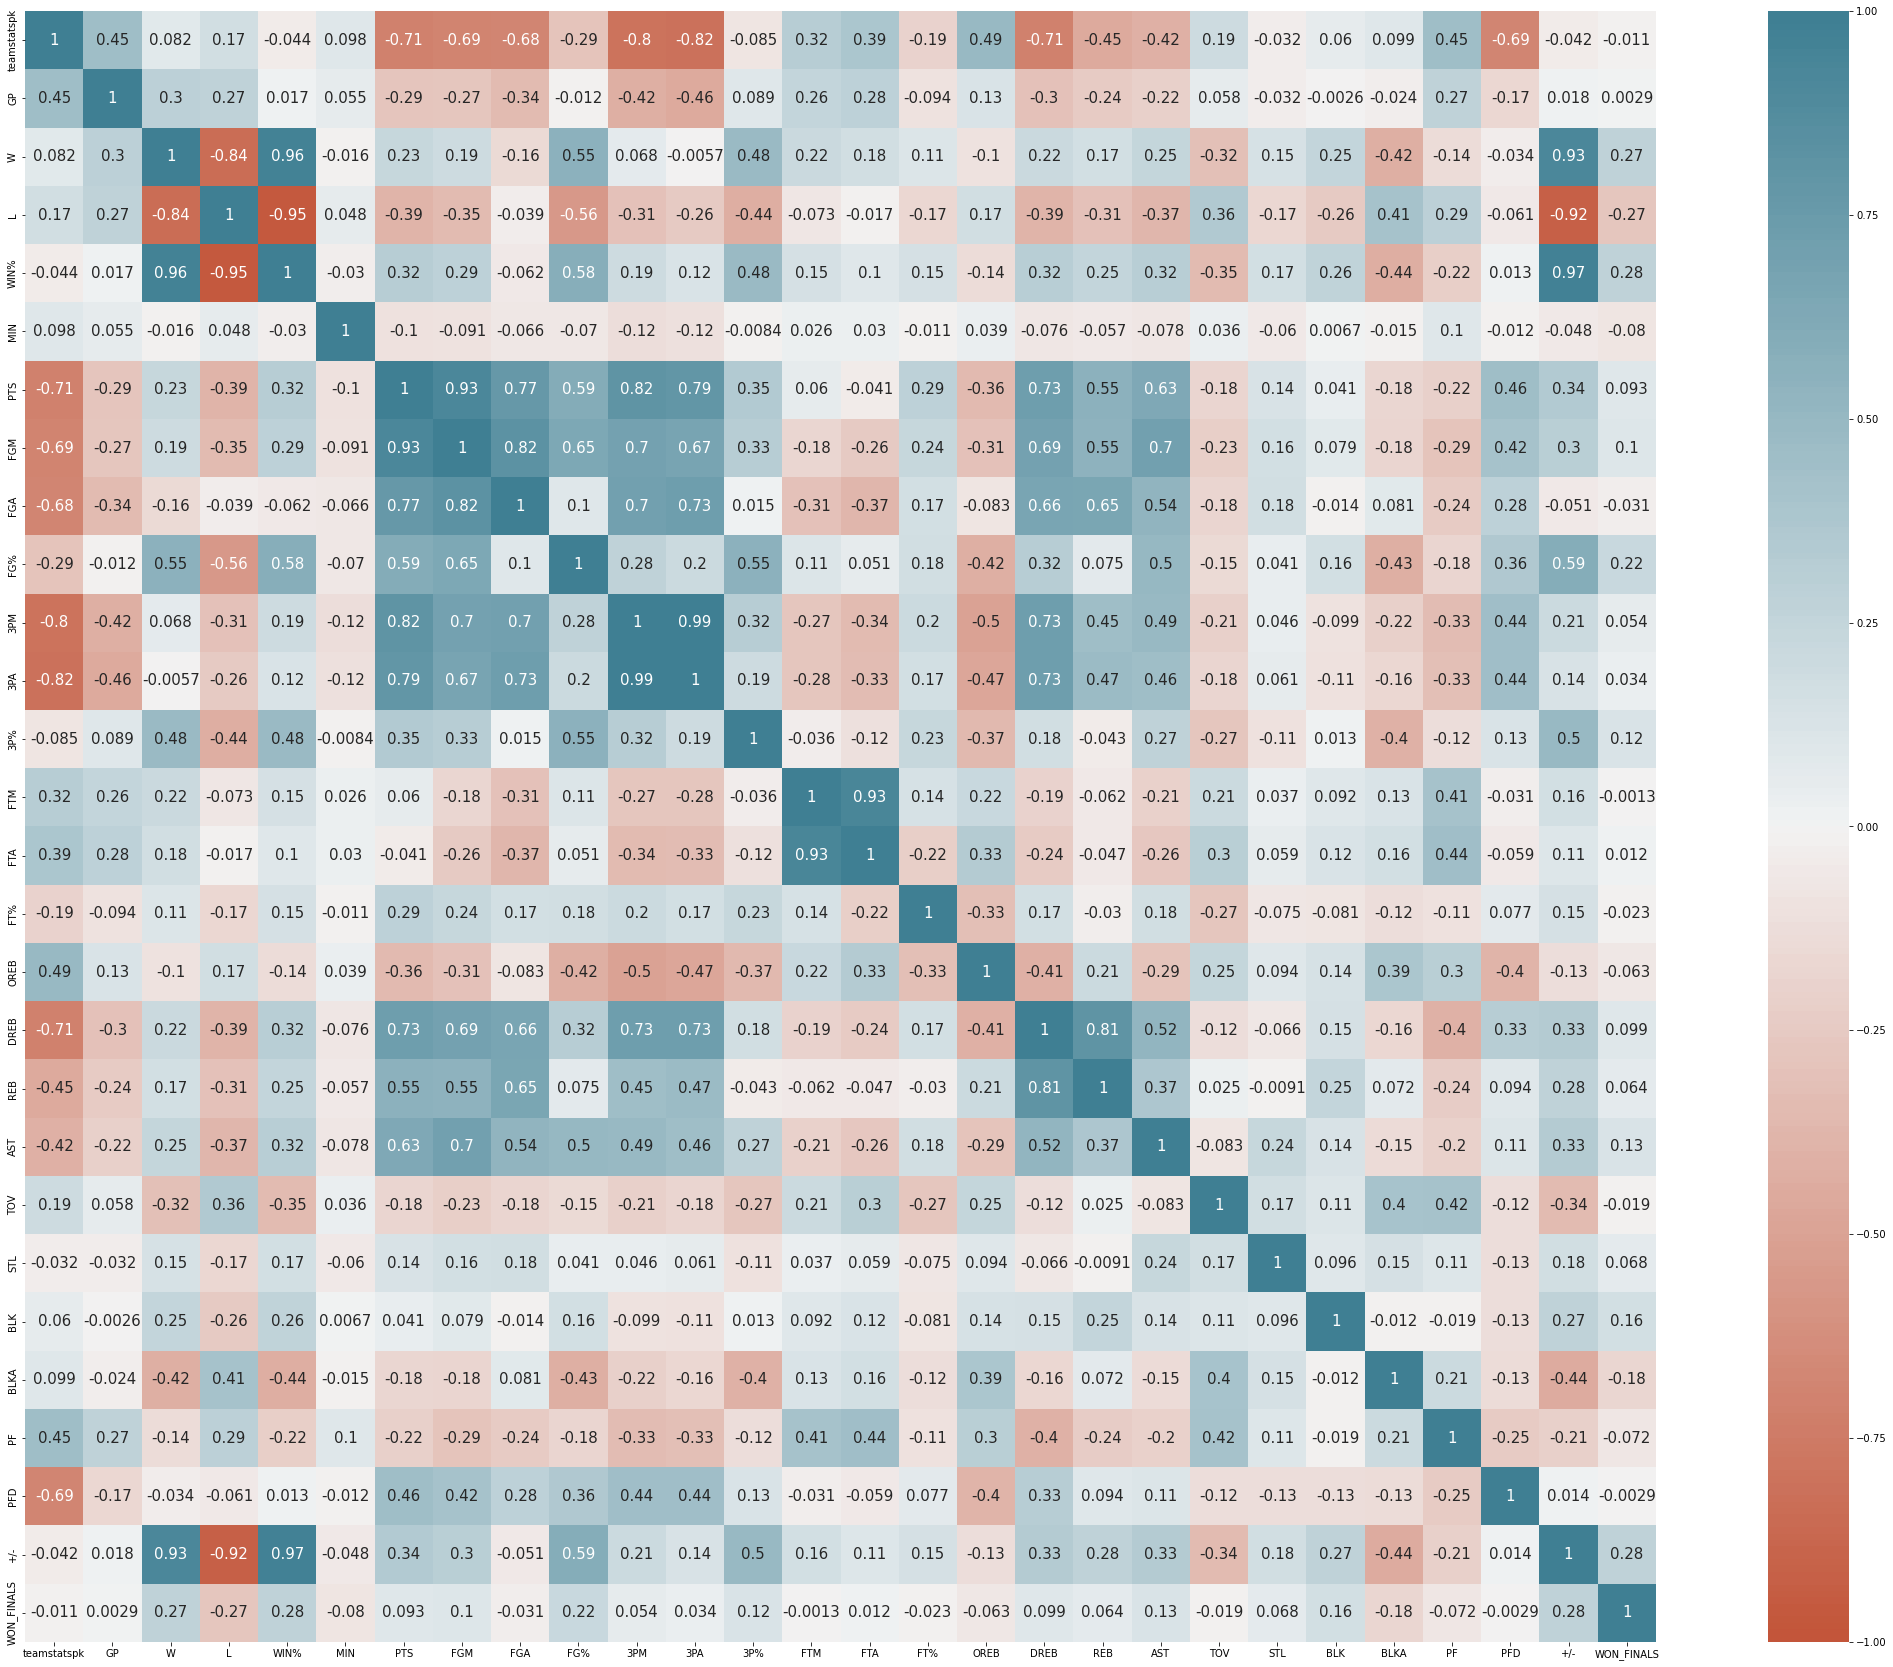

In [4]:
plt.subplots(figsize=(40,30))
sns.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, annot_kws={'size': 15},
    square=True)

In [44]:
trainDF = trainingDF.drop(['teamstatspk','GP','TEAM','W','L','SEASON'],axis=1)
testDF = testingDF.drop(['teamstatspk','GP','TEAM','W','L','SEASON'],axis=1)

In [46]:
trainX = trainDF.drop(['WON_FINALS'],axis=1)
trainY = trainDF['WON_FINALS']
print(trainX.dtypes)

WIN%    float64
MIN     float64
PTS     float64
FGM     float64
FGA     float64
FG%     float64
3PM     float64
3PA     float64
3P%     float64
FTM     float64
FTA     float64
FT%     float64
OREB    float64
DREB    float64
REB     float64
AST     float64
TOV     float64
STL     float64
BLK     float64
BLKA    float64
PF      float64
PFD     float64
+/-     float64
dtype: object


In [47]:
clf =  RandomForestClassifier(oob_score=True,bootstrap=True)
errors = []
estimators = []
for i in range(100,200):
    clf.set_params(n_estimators=i)
    clf.fit(trainX, trainY)
    estimators.append(i)
    oob_error = 1 - clf.oob_score_
    errors.append(oob_error)

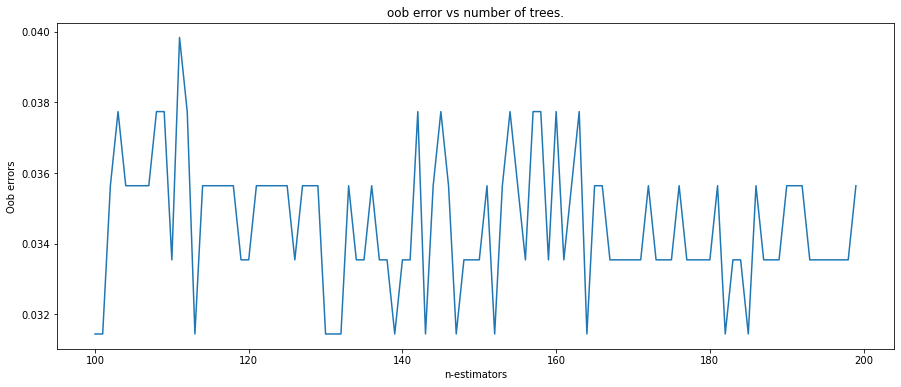

In [48]:
plt.figure(figsize=(15,6))
plt.plot(estimators, errors)
plt.xlabel("n-estimators")  # add X-axis label
plt.ylabel("Oob errors")  # add Y-axis label
plt.title("oob error vs number of trees.") 
plt.show(estimators,errors)

In [51]:
for i in range(0,100):
    if errors[i] < 0.032:
        print(str(estimators[i]) + ": " + str(errors[i]))

100: 0.03144654088050314
101: 0.03144654088050314
113: 0.03144654088050314
130: 0.03144654088050314
131: 0.03144654088050314
132: 0.03144654088050314
139: 0.03144654088050314
143: 0.03144654088050314
147: 0.03144654088050314
152: 0.03144654088050314
164: 0.03144654088050314
182: 0.03144654088050314
185: 0.03144654088050314


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
testX = testDF.drop(['WON_FINALS'],axis=1)
testY = testDF['WON_FINALS']
y_pred = clf.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       144
           1       0.00      0.00      0.00         5

    accuracy                           0.97       149
   macro avg       0.48      0.50      0.49       149
weighted avg       0.93      0.97      0.95       149



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainDF, Y, train_size = 0.7, random_state = 0)